Visualización de las primeras Filas
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1     

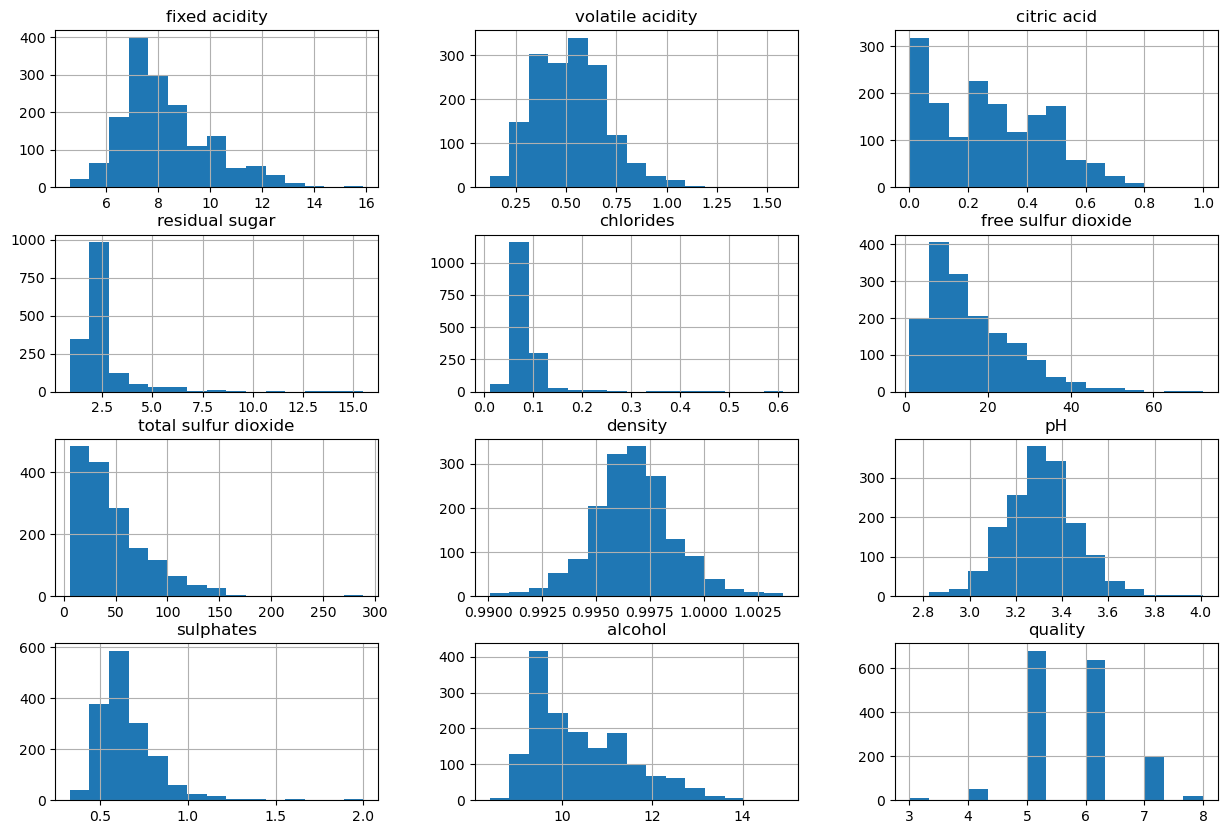

Boxplots para detectar Valores Atipicos


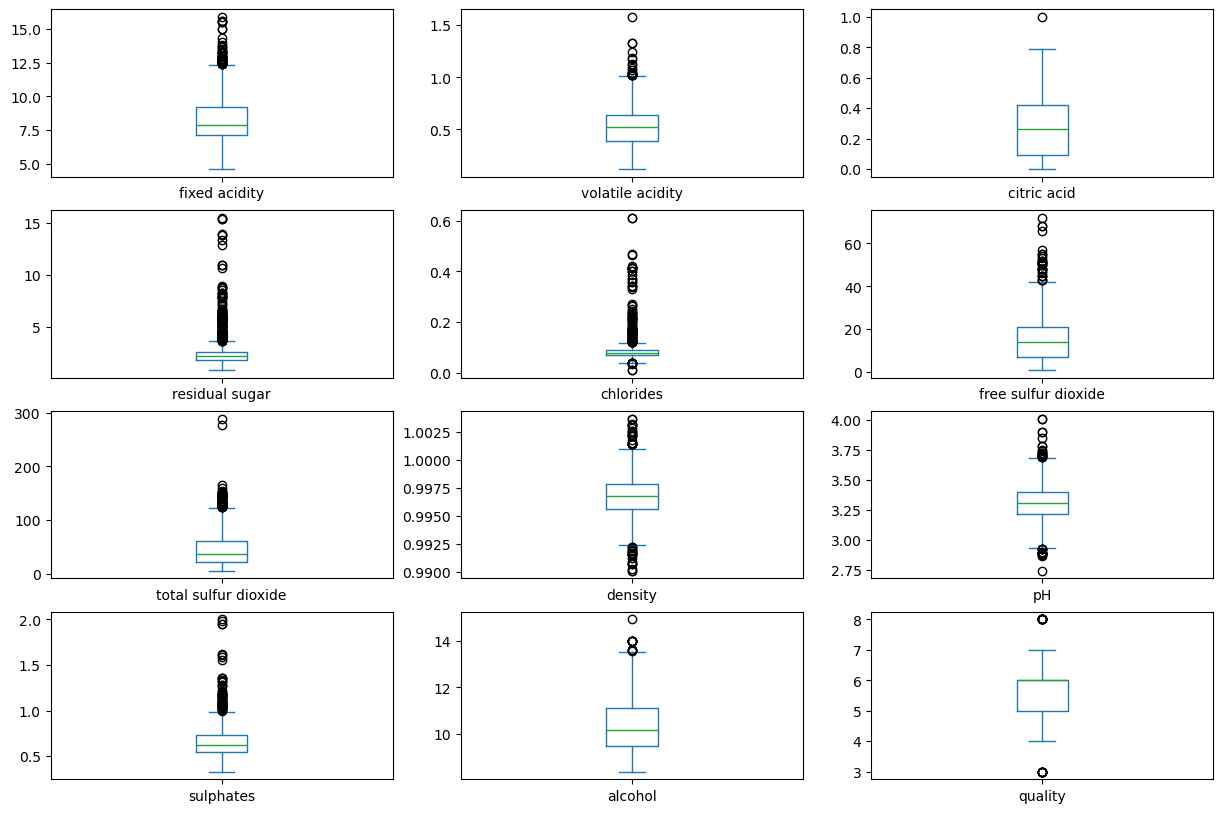

Matriz de Correlación


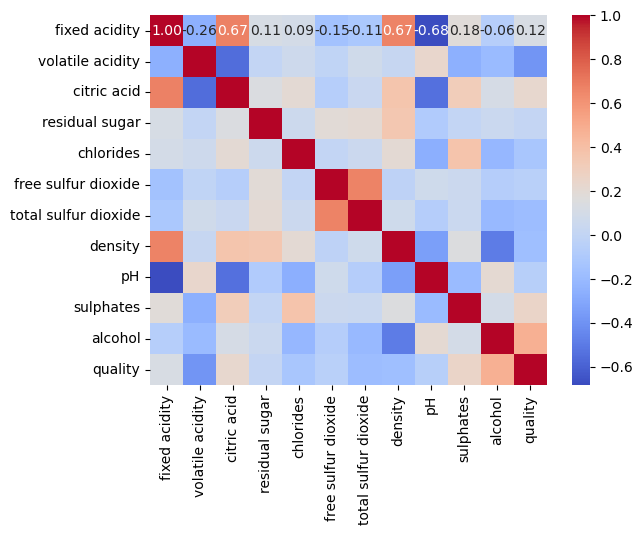

Preprocesamiento de Datos
No se detectaron valores faltantes en el conjunto de datos.
Características numéricas escaladas usando StandardScaler.
Preprocesamiento de Datos completado.
Selección de Características
Características seleccionadas (8):
fixed acidity: 6.28
volatile acidity: 60.91
citric acid: 19.69
chlorides: 6.04
total sulfur dioxide: 25.48
density: 13.40
sulphates: 22.27
alcohol: 115.85

Puntuaciones de todas las características:
          Característica  Puntuación
10               alcohol  115.854797
1       volatile acidity   60.913993
6   total sulfur dioxide   25.478510
9              sulphates   22.273376
2            citric acid   19.690664
7                density   13.396357
0          fixed acidity    6.283081
4              chlorides    6.035639
5    free sulfur dioxide    4.754233
8                     pH    4.341764
3         residual sugar    1.053374
Selección de Características completada.
Dividir el Conjunto de Datos en Entrenamiento y Prueba
Tamaño total d

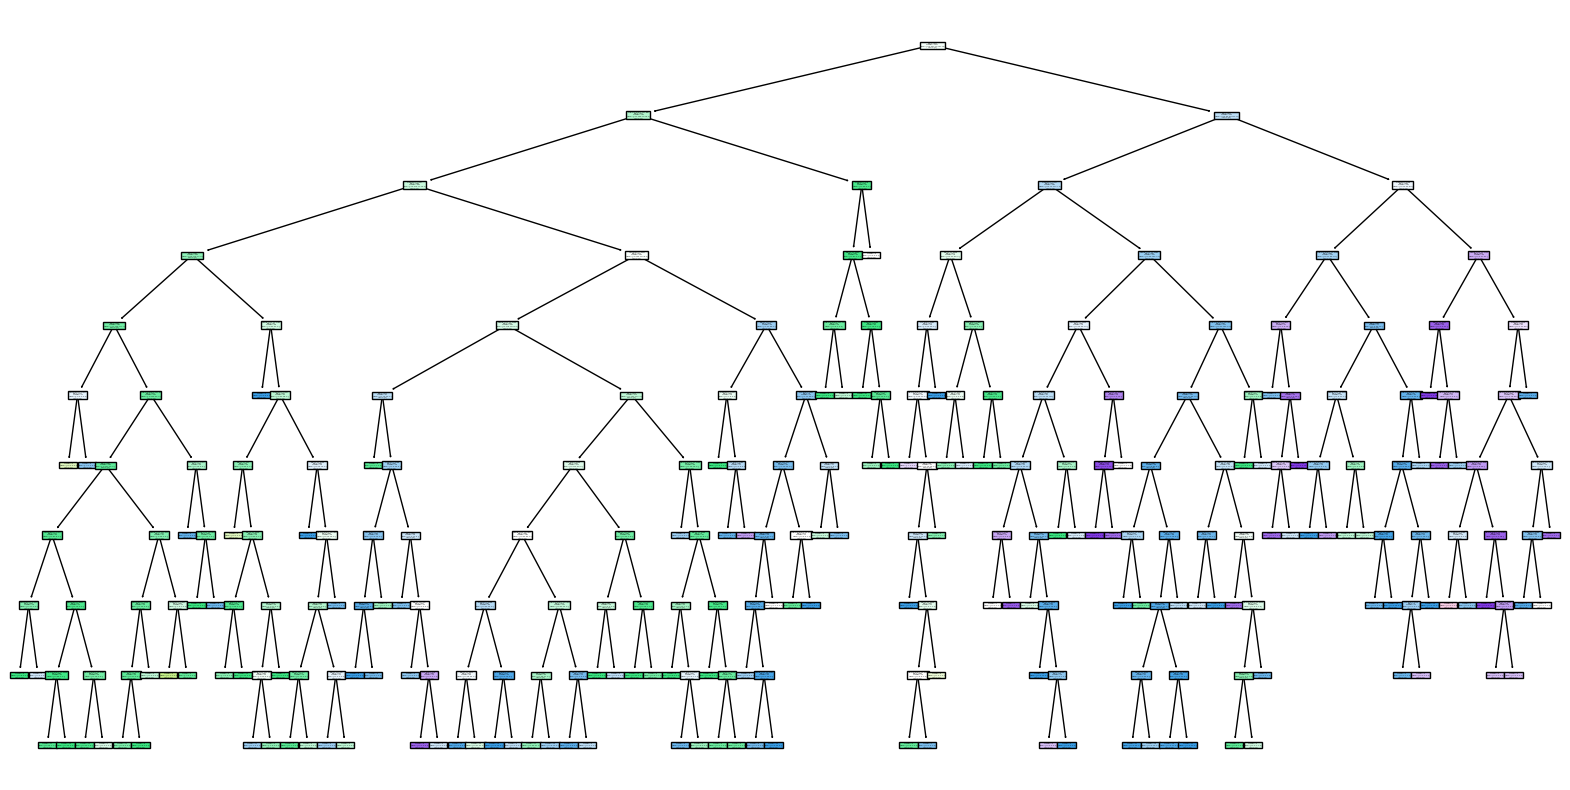

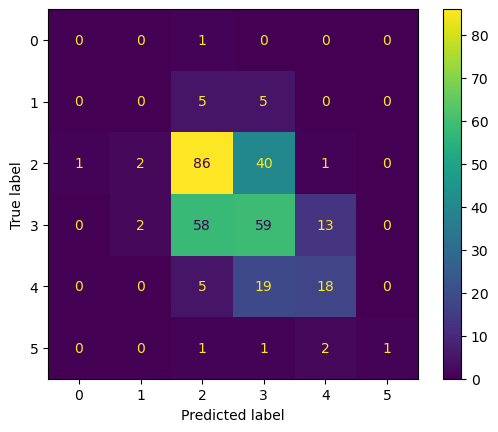

Matriz de Confusión:
 [[ 0  0  1  0  0  0]
 [ 0  0  5  5  0  0]
 [ 1  2 86 40  1  0]
 [ 0  2 58 59 13  0]
 [ 0  0  5 19 18  0]
 [ 0  0  1  1  2  1]]


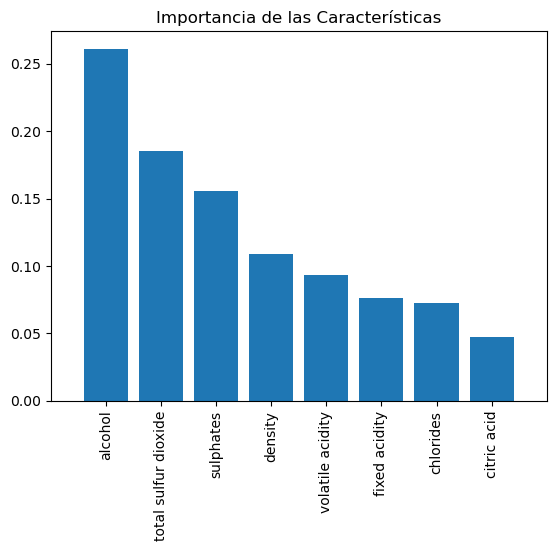

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve

# Cargar datos
datos = pd.read_csv('C:\\Users\\Otro\\Desktop\\winequality-red.csv')

# Visualizar las primeras filas
print("Visualización de las primeras Filas")

print(datos.head())

# Estadísticas descriptivas
print("Estadisticas descriptivas")

print(datos.describe())

# Histogramas de todas las características
print("Histogramas para todas las caracteristicas")

datos.hist(bins=15, figsize=(15, 10))
plt.show()

# Boxplots para detectar valores atípicos

print("Boxplots para detectar Valores Atipicos")

datos.plot(kind='box', subplots=True, layout=(4,3), figsize=(15, 10), sharex=False, sharey=False)
plt.show()

# Matriz de correlación

print("Matriz de Correlación")

matriz_corr = datos.corr()
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

## 2. Preprocesamiento de Datos
print("Preprocesamiento de Datos")
# Tratar valores faltantes si los hay
if datos.isnull().any().any():
    print("Valores faltantes detectados en el conjunto de datos.")
    datos.fillna(datos.mean(), inplace=True)  # Supuesto reemplazo por la media
    print("Valores faltantes reemplazados por la media de cada columna.")
else:
    print("No se detectaron valores faltantes en el conjunto de datos.")

# Normalización o estandarización si es necesario (opcional según el análisis)
from sklearn.preprocessing import StandardScaler
escalador = StandardScaler()
caracteristicas_escaladas = escalador.fit_transform(datos.drop('quality', axis=1))
datos_escalados = pd.DataFrame(caracteristicas_escaladas, columns=datos.columns[:-1])
datos_escalados['quality'] = datos['quality']
print("Características numéricas escaladas usando StandardScaler.")

print("Preprocesamiento de Datos completado.")

## 3. Selección de Características
print('Selección de Características')

from sklearn.feature_selection import SelectKBest, f_classif

# Seleccionar las k mejores características
k = 8  # El número de características a seleccionar, ajustable según necesidad
selector = SelectKBest(f_classif, k=k)
X_nuevo = selector.fit_transform(datos_escalados.drop('quality', axis=1), datos_escalados['quality'])
caracteristicas_seleccionadas = datos_escalados.drop('quality', axis=1).columns[selector.get_support()]

# Imprimir las características seleccionadas y sus puntuaciones
print(f"Características seleccionadas ({k}):")
for caracteristica, puntuacion in zip(caracteristicas_seleccionadas, selector.scores_[selector.get_support()]):
    print(f"{caracteristica}: {puntuacion:.2f}")

# Visualización de las puntuaciones de todas las características para análisis adicional
puntuaciones_caracteristicas = pd.DataFrame({'Característica': datos_escalados.columns[:-1], 'Puntuación': selector.scores_})
print("\nPuntuaciones de todas las características:")
print(puntuaciones_caracteristicas.sort_values(by='Puntuación', ascending=False))

print('Selección de Características completada.')

## 4. Dividir el Conjunto de Datos en Entrenamiento y Prueba
print('Dividir el Conjunto de Datos en Entrenamiento y Prueba')

from sklearn.model_selection import train_test_split

X = datos_escalados[caracteristicas_seleccionadas]
y = datos_escalados['quality']

# Definir el tamaño del conjunto de prueba
tamaño_prueba = 0.2  # 20% del conjunto de datos para la prueba, 80% para entrenamiento
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=tamaño_prueba, random_state=42)

# Impresiones para confirmar el tamaño de los conjuntos
print(f'Tamaño total del conjunto de datos: {len(datos)}')
print(f'Tamaño del conjunto de entrenamiento: {len(X_entrenamiento)} ({(len(X_entrenamiento) / len(datos) * 100):.2f}%)')
print(f'Tamaño del conjunto de prueba: {len(X_prueba)} ({(len(X_prueba) / len(datos) * 100):.2f}%)')

## 5. Entrenar el Modelo
print('Entrenar el modelo de Árbol de Decisión')

from sklearn.tree import DecisionTreeClassifier

# Configurar hiperparámetros
profundidad_maxima = 10
min_muestras_hoja = 5
modelo_arbol = DecisionTreeClassifier(max_depth=profundidad_maxima, min_samples_leaf=min_muestras_hoja, random_state=42)

# Entrenamiento del modelo
modelo_arbol.fit(X_entrenamiento, y_entrenamiento)
print(f'Modelo entrenado con max_depth={profundidad_maxima} y min_samples_leaf={min_muestras_hoja}')

# Verificar si el modelo ha sido efectivamente creado
if modelo_arbol:
    print("El modelo de árbol de decisión se ha creado y entrenado exitosamente.")
else:
    print("Error en la creación del modelo.")

## 6. Evaluar el desempeño del modelo 
print('Evaluar el desempeño del modelo')
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Predicciones
y_prediccion = modelo_arbol.predict(X_prueba)

# Métricas
print("Precisión:", precision_score(y_prueba, y_prediccion, average='macro'))
print("Recuerdo:", recall_score(y_prueba, y_prediccion, average='macro'))
print("Puntuación F1:", f1_score(y_prueba, y_prediccion, average='macro'))

## 7. Gráficos para Visualizar Resultados
print('Gráficos para visualizar resultados')
from sklearn import tree

# Visualizar el árbol de decisión
plt.figure(figsize=(20,10))
tree.plot_tree(modelo_arbol, filled=True, feature_names=caracteristicas_seleccionadas, class_names=True)
plt.show()

# Matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_prueba, y_prediccion)
display_confusion = ConfusionMatrixDisplay(confusion_matrix=cm)
display_confusion.plot()
plt.show()
print("Matriz de Confusión:\n", cm)

importancias = modelo_arbol.feature_importances_
indices = np.argsort(importancias)[::-1]

plt.figure()
plt.title("Importancia de las Características")
plt.bar(range(X_entrenamiento.shape[1]), importancias[indices], align="center")
plt.xticks(range(X_entrenamiento.shape[1]), caracteristicas_seleccionadas[indices], rotation=90)
plt.xlim([-1, X_entrenamiento.shape[1]])
plt.show()
